# Analysis Sentimen Terhadap Aplikasi Udemy

**Submission Proyek Analisis Sentimen**

**DBS Foundation Coding Camp**


*   **Nama**            : Roni Antonius Sinabutar
*   **Username**   : aantoniusron
*   **Domisili**  : Cianjur, Jawa Barat
*   **email**      : aantoniusron@gmail.com
*   **Kelas**      : Belajar Pengembangan Machine Learning

**📃 Data:**


| Kolom                | Deskripsi Singkat                                     |
|----------------------|-------------------------------------------------------|
| reviewId             | ID unik review                           |
| userName             | Nama pengguna                  |
| userImage            | URL gambar profil                            |
| content              | Isi atau teks ulasan                  |
| score                | Skor ulasan (misalnya 1-5)|
| thumbsUpCount        | Jumlah suka         |
| reviewCreatedVersion | Versi aplikasi                     |
| at                   | Tanggal dan waktu                      |
| replyContent         | Isi balasan dari pengembang aplikasi                  |
| repliedAt            | Tanggal dan waktu balasan diberikan                   |
| appVersion           | Versi aplikasi yang digunakan  |


In [1]:
# !pip install accelerate==0.22.0
# !pip install pyforest
# !pip install inflect
# !pip install contractions
# !pip install beautifulsoup4
# !pip install transformers==4.41.2 accelerate==0.30.1
# !pip install nltk
# !python -m nltk.downloader punkt
# !python -m nltk.downloader stopwords
# !python -m nltk.downloader wordnet
# !python -m nltk.downloader omw-1.4
# !python -m nltk.downloader vader_lexicon
# !pip install transformers[torch]

In [1]:
import   warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import   gc
import   nltk
import   torch
import   random
import   pickle
import   inflect
import   re, string
import   unicodedata
import   contractions
import   tensorflow.keras.backend as K

In [ ]:
from pyforest                          import *
from keras.optimizers                  import AdamW
from wordcloud                         import WordCloud
from nltk.corpus                       import stopwords
from keras.models                      import Sequential
from nltk.stem.porter                  import PorterStemmer
from bs4                               import BeautifulSoup
from sklearn.feature_extraction.text   import TfidfVectorizer
from sklearn.model_selection           import train_test_split
from nltk.sentiment.vader              import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise          import cosine_similarity, linear_kernel
from sklearn.metrics                   import classification_report, accuracy_score
from keras.layers                      import Embedding, GRU, Dense, Dropout, Flatten
from sklearn.metrics                   import precision_score, recall_score, f1_score
from nltk.tokenize                     import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem                         import LancasterStemmer, WordNetLemmatizer, SnowballStemmer
from transformers                      import (DistilBertTokenizer,
                                               DistilBertForSequenceClassification,
                                               Trainer,
                                               TrainingArguments,
                                               RobertaTokenizer,
                                               RobertaForSequenceClassification,
                                               AutoModelForSequenceClassification,
                                               AutoTokenizer)

In [2]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('vader_lexicon')
# nltk.download('sentiwordnet')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_csv('/kaggle/input/20rbudemy/udemy_review_app20rb.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20001 non-null  object
 1   userName              20001 non-null  object
 2   userImage             20001 non-null  object
 3   content               20001 non-null  object
 4   score                 20001 non-null  int64 
 5   thumbsUpCount         20001 non-null  int64 
 6   reviewCreatedVersion  18117 non-null  object
 7   at                    20001 non-null  object
 8   replyContent          9888 non-null   object
 9   repliedAt             9888 non-null   object
 10  appVersion            18117 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [6]:
df['content'][20000]

"Too much bad support My account has hacked and support didn't respond me. Even after 72 hours after send inquire I have 2 paid course in my udemy account"

In [7]:
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
19996,e277685c-38f8-4087-b18a-8a8905130e1e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Can't open this app. It's crashing.,1,0,5.13.3,2020-02-22 22:45:57,"Hi Atul,\n\nI'm sorry that you had issues with...",2020-02-23 02:25:07,5.13.3
19997,71a2b2c0-d4c7-4829-8c04-c821890f4a0b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Best in UI and features,5,0,9.23.0,2024-01-11 01:08:03,NaN,NaN,9.23.0
19998,1c81b972-7cba-46da-b6ad-58b40f289a0f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Nice and wonderfull app, I would really recome...",5,0,8.0.1,2022-07-19 06:27:07,NaN,NaN,8.0.1
19999,6563f17b-9dbe-4a9f-9c1c-e70819bc1c3a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Helpful and consolidated content.,5,0,5.2.3,2018-11-21 18:20:20,NaN,NaN,5.2.3
20000,301cc673-34c9-4fd8-b9a0-b2da94ca5179,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Too much bad support My account has hacked and...,1,0,9.13.0,2023-09-04 23:06:07,Hi there.\n\nThanks for reaching out.\n\nPleas...,2023-09-04 23:11:00,9.13.0


In [8]:
df.isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     1884
at                          0
replyContent            10113
repliedAt               10113
appVersion               1884
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df2 = df[['content']]

In [11]:
df2.columns

Index(['content'], dtype='object')

In [12]:
df2['content'][10000]

'I have opted for the course but im unable to login to the app also when im browsing the website, there is a pop to continue in the app. Please help'

In [13]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)                         # hapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)                         # hapus hashtag
    text = re.sub(r'RT[\s]', '', text)                                # hapus RT
    text = re.sub(r"http\S+", '', text)                               # hapus link
    text = re.sub(r'[0-9]+', '', text)                                # hapus angka
    text = re.sub(r'[^\w\s]', '', text)                               # hapus special karakter
    text = text.replace('\n', ' ')                                    # hapus enter
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus punctuations
    text = text.strip()                                               # hapus teks kosong
    return text

def casefoldingText(text):
    text = text.lower() 
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    stop_words_eng = set(stopwords.words('english'))
    filtered_text = [word for word in text if word.lower() not in stop_words_eng]  
    return filtered_text

def stemmingTextSnowball(text):
    snowball = SnowballStemmer('english')
    stemmed_words = [snowball.stem(word) for word in text]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

In [14]:
# membutuhkan waktu sekitar 30 menit
df2['text_clean']           = df2['content'].apply(cleaningText)

In [15]:
df2['text_casefoldingText'] = df2['text_clean'].apply(casefoldingText)

In [16]:
df2['text_tokenizingText']  = df2['text_casefoldingText'].apply(tokenizingText)

In [17]:
df2['text_stopword']        = df2['text_tokenizingText'].apply(filteringText)

In [18]:
df2['text_stem_snow']       = df2['text_stopword'].apply(stemmingTextSnowball)

In [19]:
df2['content'][9413]

'Great app. Full access to courses including download and watch offline. Works well so far!'

In [21]:
df4 = df2[['text_stem_snow']]
# df4 = pd.read_csv('/kaggle/input/20rbudemy/preprocess_text_20.csv')

In [24]:
df4

,text_stem_snow
0,thought id tri subscript plan sign month free ...
1,star cours awesom feel like ticket get promot ...
2,frequent failur reload thing everi week reques...
3,terribl terribl player freez refus play past c...
4,app absolut junk id give zero star could conte...
...,...
19996,cant open app crash
19997,best ui featur
19998,nice wonderful app would realli recomend anyon...
19999,help consolid content


### Percobaan 1
- Pelabelan: **Vander Sentiment**
- Pembagian Data: 80% training, 20% testing
- Ekstraksi Fitur: DistilBERT Tokenizer / WordPiece
- Algoritma Pelatihan: DistilBERT (Distilled BERT)

https://huggingface.co/docs/transformers/model_doc/distilbert

In [25]:
def get_sentiment_label(text):

    analyzer          = SentimentIntensityAnalyzer()
    scores            = analyzer.polarity_scores(text)
    compound_score    = scores['compound']

    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [26]:
df4['kelas'] = df4['text_stem_snow'].apply(get_sentiment_label)

In [27]:
kelas_counts = df4['kelas'].value_counts()
kelas_counts

kelas
positive    12161
negative     4616
neutral      3224
Name: count, dtype: int64

In [28]:
indeks_positif       = df4[df4['kelas'] == 'positive'].index
jumlah_baris_dihapus = int(0.48 * 12161)
indeks_dihapus       = np.random.choice(indeks_positif, size=jumlah_baris_dihapus, replace=False)

df4.drop(indeks_dihapus, inplace=True)

<IPython.core.display.Javascript object>

In [29]:
kelas_counts2 = df4['kelas'].value_counts()
kelas_counts2

kelas
positive    6324
negative    4616
neutral     3224
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

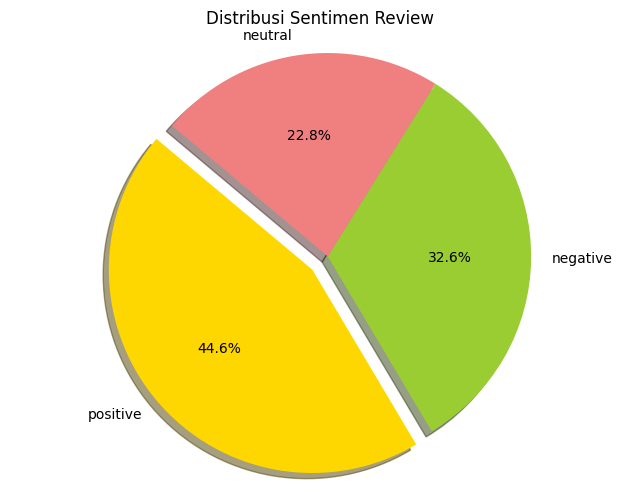

In [30]:
labels   = kelas_counts2.index
sizes    = kelas_counts2.values
colors   = ['gold', 'yellowgreen', 'lightcoral']
explode  = (0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)

plt.axis('equal')
plt.title('Distribusi Sentimen Review')
plt.show()

In [31]:
def visualisasi_wordcloud(teks, judul):
    wc = WordCloud(background_color='white').generate(teks)
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(judul)
    plt.axis('off')
    plt.show()

def buat_vis_wordcloud(df, text_column, sentiment_column, sentiment_class):
    teks = ' '.join(df[df[sentiment_column] == sentiment_class][text_column])
    visualisasi_wordcloud(teks, f'WordCloud Sentimen {sentiment_class.capitalize()}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

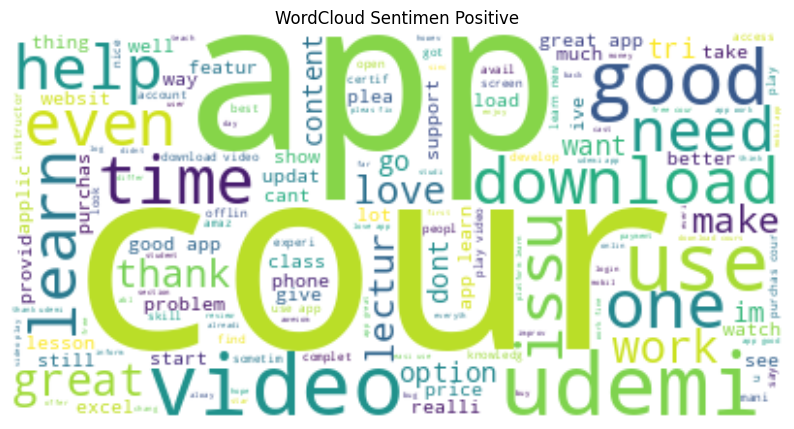

In [32]:
buat_vis_wordcloud(df4, 'text_stem_snow', 'kelas', 'positive')

In [33]:
df4.tail()

,text_stem_snow,kelas
19996,cant open app crash,positive
19997,best ui featur,positive
19998,nice wonderful app would realli recomend anyon...,positive
19999,help consolid content,positive
20000,much bad support account hack support didnt re...,positive


In [34]:
X = df4['text_stem_snow']
y = df4['kelas']

#### Berdasarkan observasi terhadap kata-kata yang muncul setiap kelasnya. Mungkin teknik ekstraksi fitur yang cocok adalah menggunakan TF-IDF, hal ini dikarenakan teknik tersebut mampu memberikan bobot pada kata yang jarang muncul pada suatu dokumen namun dianggap penting. Mungkin TF-IDF akan cocok untuk model Machine Learning seperti NB, RF, atau DT.

In [35]:
tf_idf   = TfidfVectorizer(max_features=500, min_df=10, max_df=0.8)

In [36]:
X_tf_idf = tf_idf.fit_transform(X)

In [37]:
X_tf_idf.shape

(14164, 500)

In [38]:
features_df = pd.DataFrame(X_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())

features_df.head()

<IPython.core.display.Javascript object>

,abl,absolut,access,account,actual,ad,add,address,afford,allow,...,work,worst,worth,would,wrong,year,yet,your,youtub,zoom
0,0.0,0.0,0.0,0.0,0.235744,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.230071,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.199892,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.150677,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

<IPython.core.display.Javascript object>

In [41]:
y_train.value_counts()

kelas
positive    5065
negative    3673
neutral     2593
Name: count, dtype: int64

In [42]:
label_map                 = {'positive': 2, 'negative': 0, 'neutral': 1}
y_train_encoded           = y_train.map(label_map)
y_test_encoded            = y_test.map(label_map)

In [43]:
distilbert_tokenizer      = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-distilled-squad')

def preprocess_distilbert_data(examples):
    return distilbert_tokenizer(examples.tolist(), truncation=True, padding=True)

train_distilbert_encodings = preprocess_distilbert_data(X_train)
test_distilbert_encodings  = preprocess_distilbert_data(X_test)

In [44]:
# ubah data latih dan test menjadi tipe data torch yang diterima oleh model DistilBERT

class DistilBertSentimentDataset(torch.utils.data.Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings  = encodings
        self.labels     = labels

    def __getitem__(self, idx):
        item            = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels']  = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [45]:
train_distilbert_dataset = DistilBertSentimentDataset(train_distilbert_encodings, y_train_encoded.values)
test_distilbert_dataset  = DistilBertSentimentDataset(test_distilbert_encodings, y_test_encoded.values)

In [46]:
distilbert_model         = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-distilled-squad',
                                                                               num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-distilled-squad and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
# latih
distilbert_training_config = TrainingArguments(output_dir='./results',
                                               per_device_train_batch_size=19,
                                               per_device_eval_batch_size=19,
                                               num_train_epochs=3,
                                               logging_dir='./logs',
                                               logging_steps=10,
                                               evaluation_strategy='epoch',
                                               save_strategy='epoch')

distilbert_trainer = Trainer(model = distilbert_model,
                             args  = distilbert_training_config,
                             train_dataset = train_distilbert_dataset,
                             eval_dataset  = test_distilbert_dataset)

In [49]:
distilbert_trainer.train()

Epoch,Training Loss,Validation Loss
1,0.191800,0.274474
2,0.146400,0.253825
3,0.087000,0.248339


TrainOutput(global_step=1791, training_loss=0.253590343063484, metrics={'train_runtime': 583.4437, 'train_samples_per_second': 58.263, 'train_steps_per_second': 3.07, 'total_flos': 1609486639311438.0, 'train_loss': 0.253590343063484, 'epoch': 3.0})

In [50]:
# Evaluasi data latih
train_distilbert_predictions = distilbert_trainer.predict(train_distilbert_dataset)
train_distilbert_preds       = np.argmax(train_distilbert_predictions.predictions, axis=-1)

train_distilbert_report      = classification_report(y_train_encoded,
                                                     train_distilbert_preds,
                                                     target_names=label_map.keys())

print("Training Report:")
print(train_distilbert_report)

<IPython.core.display.Javascript object>

Training Report:
              precision    recall  f1-score   support

    positive       0.97      0.99      0.98      3673
    negative       0.98      0.93      0.96      2593
     neutral       0.98      0.99      0.98      5065

    accuracy                           0.98     11331
   macro avg       0.98      0.97      0.97     11331
weighted avg       0.98      0.98      0.98     11331



In [51]:
# Evaluasi Data Uji
test_distilbert_predictions = distilbert_trainer.predict(test_distilbert_dataset)
test_distilbert_preds       = np.argmax(test_distilbert_predictions.predictions, axis=-1)

test_distilbert_report      = classification_report(y_test_encoded,
                                                    test_distilbert_preds,
                                                    target_names=label_map.keys())

print("Test Report:")
print(test_distilbert_report)

<IPython.core.display.Javascript object>

Test Report:
              precision    recall  f1-score   support

    positive       0.92      0.94      0.93       943
    negative       0.94      0.89      0.91       631
     neutral       0.95      0.96      0.95      1259

    accuracy                           0.94      2833
   macro avg       0.94      0.93      0.93      2833
weighted avg       0.94      0.94      0.94      2833



In [53]:
torch.save(distilbert_tokenizer, '/kaggle/working/distilbert_tokenizer.pth')

model_state_dict2 = distilbert_model.state_dict()
torch.save(model_state_dict, '/kaggle/working/distilbert_model.pth')

optimizer_state_dict2 = distilbert_trainer.optimizer.state_dict()
torch.save(optimizer_state_dict2, '/kaggle/working/distilbert_trainer_optimizer.pth')

<IPython.core.display.Javascript object>

In [54]:
# hapus memori gpu
del distilbert_model
del distilbert_trainer
del train_distilbert_predictions
del test_distilbert_predictions
del train_distilbert_dataset
del test_distilbert_dataset
del train_distilbert_encodings
del test_distilbert_encodings
del train_distilbert_preds
del test_distilbert_preds
del distilbert_tokenizer

K.clear_session()
torch.cuda.empty_cache()
gc.collect()

30

#### Percobaan Ke-2 dengan TF-IDF dan GRU

In [56]:
X_tf_idf.shape

(14164, 500)

In [57]:
y_encoded = y.map(label_map)

X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(X_tf_idf,
                                                                    y_encoded,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [58]:
X_train_idf.shape

(11331, 500)

In [59]:
y_train_idf.shape

(11331,)

In [60]:
# siapkan data untuk GRU

X_train_idf = X_train_idf.toarray().reshape((X_train_idf.shape[0], X_train_idf.shape[1], 1))
X_test_idf  = X_test_idf.toarray().reshape((X_test_idf.shape[0], X_test_idf.shape[1], 1))

In [61]:
gru_model5  = Sequential()
gru_model5.add(GRU(units=128, return_sequences=True, input_shape=(X_train_idf.shape[1], 1)))
gru_model5.add(Dropout(0.2))
gru_model5.add(Flatten())
gru_model5.add(Dense(3, activation='softmax'))

gru_model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history5    = gru_model5.fit(X_train_idf,
                             y_train_idf,
                             epochs=5,
                             batch_size=19,
                             validation_data=(X_test_idf, y_test_idf))

Epoch 1/5
597/597 [==============================] - 17s 20ms/step - loss: 0.7125 - accuracy: 0.6953 - val_loss: 0.5491 - val_accuracy: 0.7956
Epoch 2/5
597/597 [==============================] - 11s 18ms/step - loss: 0.5104 - accuracy: 0.8140 - val_loss: 0.5287 - val_accuracy: 0.8129
Epoch 3/5
597/597 [==============================] - 12s 19ms/step - loss: 0.4850 - accuracy: 0.8292 - val_loss: 0.5278 - val_accuracy: 0.8203
Epoch 4/5
597/597 [==============================] - 11s 19ms/step - loss: 0.4731 - accuracy: 0.8385 - val_loss: 0.5403 - val_accuracy: 0.8207
Epoch 5/5
597/597 [==============================] - 12s 19ms/step - loss: 0.4604 - accuracy: 0.8445 - val_loss: 0.5247 - val_accuracy: 0.8239


In [63]:
# evaluasi
gru_loss, gru_acc = gru_model5.evaluate(X_test_idf, y_test_idf)
print(f'Test Accuracy for GRU: {gru_acc:.3f}')

89/89 [==============================] - 1s 9ms/step - loss: 0.5247 - accuracy: 0.8239
Test Accuracy for GRU: 0.824


In [64]:
gru_preds       = gru_model5.predict(X_test_idf)
gru_preds_class = np.argmax(gru_preds, axis=1)

print("Test Report for GRU:")
print(classification_report(y_test_idf, gru_preds_class, target_names=label_map.keys()))

89/89 [==============================] - 1s 8ms/step


<IPython.core.display.Javascript object>

Test Report for GRU:
              precision    recall  f1-score   support

    positive       0.77      0.80      0.79       943
    negative       0.79      0.80      0.79       631
     neutral       0.88      0.86      0.87      1259

    accuracy                           0.82      2833
   macro avg       0.81      0.82      0.82      2833
weighted avg       0.83      0.82      0.82      2833



In [65]:
del gru_model5
del history5
del gru_preds
del gru_preds_class
del X_train_idf
del X_test_idf
del y_train_idf
del y_test_idf

tf.keras.backend.clear_session()
gc.collect()

<IPython.core.display.Javascript object>

4998

In [66]:
torch.cuda.empty_cache()

#### Percobaan Ke-3 ALBERT

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments

# Load the pre-trained tokenizer and model
albert_tokenizer = AlbertTokenizer.from_pretrained('albert-xxlarge-v2')
albert_model = AlbertForSequenceClassification.from_pretrained('albert-xxlarge-v2', num_labels=3)

In [ ]:
# Define the tokenize function
def albert_tokenize_function(examples):
    return albert_tokenizer(examples.tolist(), truncation=True, padding=True)

# Tokenize the data
X_albert = albert_tokenize_function(X_train)
y_albert = y_train_encoded.values

In [ ]:
# Create a custom dataset class
class AlbertSentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Create the dataset instances
train_dataset_albert = AlbertSentimentDataset(X_albert, y_albert)
test_dataset_albert = AlbertSentimentDataset(albert_tokenize_function(X_test), y_test_encoded.values)

In [ ]:
# Define the training arguments
training_args_albert = TrainingArguments(
    output_dir='./results_albert',      # Lokasi di mana hasil pelatihan akan disimpan
    per_device_train_batch_size=19,      # Ukuran batch pelatihan
    per_device_eval_batch_size=19,       # Ukuran batch evaluasi
    num_train_epochs=3,                  # Jumlah epochs
    logging_dir='./logs_albert',        # Direktori logging
    logging_steps=10,                    # Frekuensi logging
    evaluation_strategy='epoch',         # Evaluasi pada akhir setiap epoch
    save_strategy='epoch'               # Menyimpan model pada akhir setiap epoch
)

# Create the trainer instance
trainer_albert = Trainer(
    model=albert_model,
    args=training_args_albert,
    train_dataset=train_dataset_albert,
    eval_dataset=test_dataset_albert
)

In [ ]:
trainer_albert.train()

In [ ]:
train_predictions_albert = trainer_albert.predict(train_dataset_albert)
train_preds_albert = np.argmax(train_predictions_albert.predictions, axis=-1)
train_report_albert = classification_report(y_train_encoded, train_preds_albert, target_names=label_map.keys())

print("Training Report for ALBERT:")
print(train_report_albert)

In [ ]:
test_predictions_albert = trainer_albert.predict(test_dataset_albert)
test_preds_albert = np.argmax(test_predictions_albert.predictions, axis=-1)
test_report_albert = classification_report(y_test_encoded, test_preds_albert, target_names=label_map.keys())

print("Test Report for ALBERT:")
print(test_report_albert)

#### Percobaan ke-3 RoBERTa

In [67]:
# roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [68]:
# def roberta_tokenize_function(examples):
#     return roberta_tokenizer(examples.tolist(), truncation=True, padding=True)

In [69]:
# train_encodings_roberta = roberta_tokenize_function(X_train)
# test_encodings_roberta  = roberta_tokenize_function(X_test)

In [70]:
# class RobertaSentimentDataset(torch.utils.data.Dataset):
    
#     def __init__(self, encodings, labels):
#         self.encodings  = encodings
#         self.labels     = labels

#     def __getitem__(self, idx):
#         item            = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         item['labels']  = torch.tensor(self.labels[idx])
#         return item

#     def __len__(self):
#         return len(self.labels)

In [71]:
# train_dataset_roberta = RobertaSentimentDataset(train_encodings_roberta, y_train_encoded.values)
# test_dataset_roberta  = RobertaSentimentDataset(test_encodings_roberta, y_test_encoded.values)

In [72]:
# # roberta-base-openai-detector
# roberta_model         = RobertaForSequenceClassification.from_pretrained('roberta-base',
#                                                                          num_labels=3)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
# training_args_roberta = TrainingArguments(output_dir='./results_roberta',
#                                           per_device_train_batch_size=21,
#                                           per_device_eval_batch_size=21, 
#                                           num_train_epochs=3,
#                                           logging_dir='./logs_roberta',
#                                           logging_steps=10,
#                                           evaluation_strategy='epoch',
#                                           save_strategy='epoch')

# trainer_roberta = Trainer(model = roberta_model,
#                           args  = training_args_roberta,
#                           train_dataset = train_dataset_roberta,
#                           eval_dataset  = test_dataset_roberta)

In [74]:
# trainer_roberta.train()

Epoch,Training Loss,Validation Loss
1,0.528400,0.421994
2,0.279300,0.292601
3,0.127800,0.276381


TrainOutput(global_step=1620, training_loss=0.3763484098661093, metrics={'train_runtime': 1054.4534, 'train_samples_per_second': 32.238, 'train_steps_per_second': 1.536, 'total_flos': 3022098618607866.0, 'train_loss': 0.3763484098661093, 'epoch': 3.0})

In [75]:
# train_predictions_roberta = trainer_roberta.predict(train_dataset_roberta)
# train_preds_roberta       = np.argmax(train_predictions_roberta.predictions, axis=-1)
# train_report_roberta      = classification_report(y_train_encoded, train_preds_roberta, target_names=label_map.keys())

# print("Training Report for RoBERTa:")
# print(train_report_roberta)

<IPython.core.display.Javascript object>

Training Report for RoBERTa:
              precision    recall  f1-score   support

    positive       0.94      0.98      0.96      3673
    negative       0.96      0.91      0.93      2593
     neutral       0.97      0.97      0.97      5065

    accuracy                           0.96     11331
   macro avg       0.96      0.95      0.95     11331
weighted avg       0.96      0.96      0.96     11331



In [76]:
# test_predictions_roberta = trainer_roberta.predict(test_dataset_roberta)
# test_preds_roberta       = np.argmax(test_predictions_roberta.predictions, axis=-1)
# test_report_roberta      = classification_report(y_test_encoded, test_preds_roberta, target_names=label_map.keys())

# print("Test Report for RoBERTa:")
# print(test_report_roberta)

<IPython.core.display.Javascript object>

Test Report for RoBERTa:
              precision    recall  f1-score   support

    positive       0.88      0.94      0.91       943
    negative       0.92      0.86      0.89       631
     neutral       0.95      0.93      0.94      1259

    accuracy                           0.92      2833
   macro avg       0.92      0.91      0.91      2833
weighted avg       0.92      0.92      0.92      2833



In [77]:
del roberta_model
del roberta_tokenizer
del trainer_roberta
del train_predictions_roberta
del test_predictions_roberta
del train_dataset_roberta
del test_dataset_roberta
del train_encodings_roberta
del test_encodings_roberta
del train_preds_roberta
del test_preds_roberta

torch.cuda.empty_cache()
gc.collect()

33

#### Percobaan ke-4 Menggunakan Algoritma Pelatihan dari HuggingFace yaitu 'twitter-roberta-base-sentiment'

In [78]:
twitter_roberta_tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
twitter_roberta_model     = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment',
                                                                               num_labels=3)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [79]:
def twitter_roberta_tokenize_function(examples):
    return twitter_roberta_tokenizer(examples.tolist(), truncation=True, padding=True)

X_twitter_roberta = twitter_roberta_tokenize_function(X_train)
y_twitter_roberta = y_train_encoded.values

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [80]:
class TwitterRobertaSentimentDataset(torch.utils.data.Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings  = encodings
        self.labels     = labels

    def __getitem__(self, idx):
        item            = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels']  = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [81]:
train_dataset_twitter_roberta = TwitterRobertaSentimentDataset(X_twitter_roberta, y_twitter_roberta)
test_dataset_twitter_roberta  = TwitterRobertaSentimentDataset(twitter_roberta_tokenize_function(X_test),
                                                               y_test_encoded.values)

In [82]:
training_args_twitter_roberta = TrainingArguments(output_dir='./results_twitter_roberta',
                                                  per_device_train_batch_size=18,
                                                  per_device_eval_batch_size=18,
                                                  num_train_epochs=3,
                                                  logging_dir='./logs_twitter_roberta',
                                                  logging_steps=10,
                                                  evaluation_strategy='epoch',
                                                  save_strategy='epoch')

trainer_twitter_roberta = Trainer(model = twitter_roberta_model,
                                  args  = training_args_twitter_roberta,
                                  train_dataset = train_dataset_twitter_roberta,
                                  eval_dataset  = test_dataset_twitter_roberta)

In [83]:
trainer_twitter_roberta.train()

Epoch,Training Loss,Validation Loss
1,0.293400,0.314679
2,0.196500,0.214693
3,0.063000,0.238790


TrainOutput(global_step=1890, training_loss=0.24160021548233335, metrics={'train_runtime': 1060.931, 'train_samples_per_second': 32.041, 'train_steps_per_second': 1.781, 'total_flos': 3022098618607866.0, 'train_loss': 0.24160021548233335, 'epoch': 3.0})

In [84]:
train_predictions_twitter_roberta = trainer_twitter_roberta.predict(train_dataset_twitter_roberta)
train_preds_twitter_roberta       = np.argmax(train_predictions_twitter_roberta.predictions, axis=-1)

train_report_twitter_roberta      = classification_report(y_train_encoded,
                                                          train_preds_twitter_roberta,
                                                          target_names=label_map.keys())

print("Training Report for Twitter RoBERTa:")
print(train_report_twitter_roberta)

<IPython.core.display.Javascript object>

Training Report for Twitter RoBERTa:
              precision    recall  f1-score   support

    positive       0.97      0.99      0.98      3673
    negative       0.98      0.93      0.96      2593
     neutral       0.98      0.99      0.99      5065

    accuracy                           0.98     11331
   macro avg       0.98      0.97      0.97     11331
weighted avg       0.98      0.98      0.98     11331



In [85]:
test_predictions_twitter_roberta = trainer_twitter_roberta.predict(test_dataset_twitter_roberta)
test_preds_twitter_roberta       = np.argmax(test_predictions_twitter_roberta.predictions, axis=-1)

test_report_twitter_roberta      = classification_report(y_test_encoded,
                                                         test_preds_twitter_roberta,
                                                         target_names=label_map.keys())

<IPython.core.display.Javascript object>

In [86]:
print("Test Report for Twitter RoBERTa:")
print(test_report_twitter_roberta)

Test Report for Twitter RoBERTa:
              precision    recall  f1-score   support

    positive       0.92      0.95      0.94       943
    negative       0.92      0.89      0.91       631
     neutral       0.96      0.95      0.96      1259

    accuracy                           0.94      2833
   macro avg       0.93      0.93      0.93      2833
weighted avg       0.94      0.94      0.94      2833



In [90]:
torch.save(twitter_roberta_tokenizer, '/kaggle/working/twitter_roberta_tokenizer.pth')

model_state_dict = twitter_roberta_model.state_dict()
torch.save(model_state_dict, '/kaggle/working/twitter_roberta_model.pth')

optimizer_state_dict = trainer_twitter_roberta.optimizer.state_dict()
torch.save(optimizer_state_dict, '/kaggle/working/twitter_roberta_optimizer.pth')

In [3]:
del train_predictions_twitter_roberta
del test_predictions_twitter_roberta
del train_dataset_twitter_roberta
del test_dataset_twitter_roberta
del X_twitter_roberta
del y_twitter_roberta
del train_preds_twitter_roberta
del test_preds_twitter_roberta

torch.cuda.empty_cache()
gc.collect()

In [91]:
kalimat_baru             = input("Masukkan kalimat baru: ")

kalimat_baru_cleaned     = cleaningText(kalimat_baru)
kalimat_baru_casefolded  = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_tokenized   = tokenizingText(kalimat_baru_casefolded)
kalimat_baru_filtered    = filteringText(kalimat_baru_tokenized)
kalimat_baru_final       = stemmingTextSnowball(kalimat_baru_filtered)

inputs                   = twitter_roberta_tokenizer(kalimat_baru_final,
                                                     return_tensors='pt',
                                                     truncation=True,
                                                     padding=True)

class TwitterRobertaSentimentDataset(torch.utils.data.Dataset):
    
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item           = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return 1

dataset           = TwitterRobertaSentimentDataset(inputs)
predictions       = trainer_twitter_roberta.predict(dataset)
prediksi_sentimen = np.argmax(predictions.predictions, axis=-1)
label_map         = {'positive': 2, 'negative': 0, 'neutral': 1}
labels            = list(label_map.keys())
predicted_label   = labels[prediksi_sentimen[0]]  # Get the first element of the array

print(f"Sentimen kalimat baru adalah {predicted_label}.")

Masukkan kalimat baru: I'm not impressed with Udemy's app. The course I took was riddled with errors, and the interface was clunky. It's frustrating when you're trying to learn, but the app gets in the way. Needs a major overhaul.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sentimen kalimat baru adalah negative.
